<a href="https://colab.research.google.com/github/DBP625/DeepLearing_CampusX/blob/master/Copy_of_zero_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape1.csv')

In [3]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


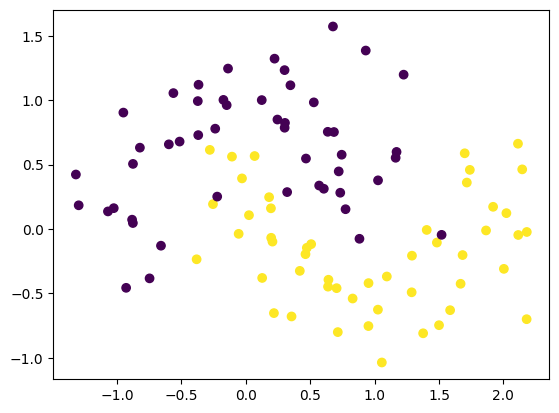

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2)) #since the i/p is X,Y
model.add(Dense(1,activation='relu'))  #output is Class ; there is only one hidden layer

model.summary()
#Dense means 1 layer with 2 neurons[i/p]  ; dense_1 means there is one output

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Set parameters to 0
model.get_weights()

[array([[ 0.61089754, -0.3879193 ],
        [ 0.14792085,  0.21775079]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.45524228],
        [-1.227387  ]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
initial_weights = model.get_weights()

#### Weight Initialization to Zero

In [12]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)


In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.4617 - loss: 8.6767 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5046 - loss: 7.9841 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5046 - loss: 7.9841 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4773 - loss: 8.4249 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5046 - loss: 7.9841 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5125 - loss: 7.8582 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4890 - loss: 8.2360 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4695 - loss: 8.5508 - val_accuracy: 0.5000 - val_loss

### For initial zero initialization
### the weights are not updated

In [17]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

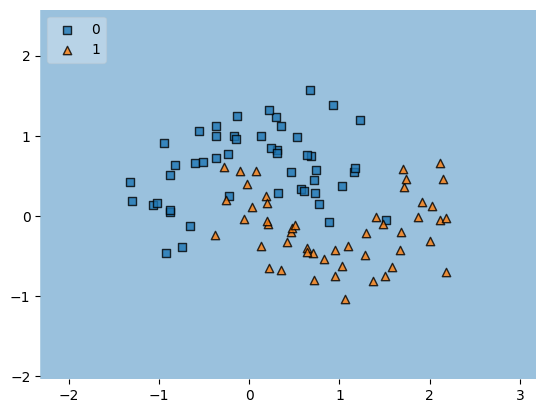

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

### Now using tanh

In [20]:
model_new = Sequential()

model_new.add(Dense(2,activation='tanh',input_dim=2))
model_new.add(Dense(1,activation='tanh'))

model_new.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Set parameters to 0
model_new.get_weights()

[array([[ 0.9096576 , -0.5627356 ],
        [ 0.9041861 ,  0.19402802]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8795076],
        [-0.6864697]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
initial_weights = model_new.get_weights()

In [23]:
initial_weights[0] = np.zeros(model_new.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [26]:
model_new.set_weights(initial_weights)

In [27]:
model_new.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history = model_new.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.4929 - loss: 8.1730 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4812 - loss: 8.3619 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4617 - loss: 8.6767 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4812 - loss: 8.3619 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5125 - loss: 7.8582 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4968 - loss: 8.1101 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4929 - loss: 8.1730 - val_accuracy: 0.5000 - val_loss: 8.0590
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5203 - loss: 7.7323 - val_accuracy: 0.5000 - val_loss

### Still it is zero

In [33]:
model_new.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]